<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

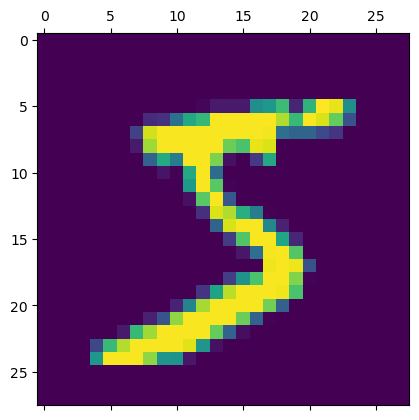

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8697 - loss: 0.4630
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9620 - loss: 0.1265
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9743 - loss: 0.0852
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9802 - loss: 0.0657
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9848 - loss: 0.0501


In [15]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [17]:
model.get_weights()

[array([[ 0.03001767,  0.03129199, -0.04639865, ...,  0.07602397,
         -0.03081349, -0.04326812],
        [ 0.05111988, -0.0806273 ,  0.06139861, ..., -0.04207706,
          0.04353639, -0.06405814],
        [-0.00789211,  0.01641131, -0.05681146, ...,  0.02108306,
         -0.00362502, -0.03377028],
        ...,
        [-0.04337348,  0.08109249,  0.00103485, ..., -0.06951015,
         -0.02638506,  0.00324897],
        [ 0.06789148,  0.02050848, -0.01304138, ...,  0.05407436,
          0.02283429, -0.02000974],
        [-0.04574325, -0.07515234,  0.0379633 , ...,  0.01523186,
         -0.02592264,  0.0570491 ]], dtype=float32),
 array([ 0.0204905 ,  0.13987236,  0.15655746,  0.01730761,  0.06148824,
        -0.03271354,  0.06260909, -0.14870775,  0.07438342,  0.11599087,
         0.01730685, -0.01936482,  0.05592813, -0.00526026, -0.12554216,
        -0.0212536 ,  0.08675691,  0.06670192, -0.02522797,  0.01710476,
         0.10859086, -0.01180353,  0.08669147,  0.16839942,  0.023

In [31]:
 %load_ext tensorboard
 %tensorboard --logdir logs/fit